In [1]:
# libraries
import string
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
import torch
from torch.autograd import Variable
import numpy as np
import torch.functional as F
import torch.nn.functional as F
import pandas as pd
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mukhtar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mukhtar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mukhtar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mukhtar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# tokenizer
def preprocess(sentence):
    
    wordnet_lemmatizer = WordNetLemmatizer()
    sentence = stemmer.stem(sentence) 
    sentence = sentence.lower()
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(sentence)
    filtered_words = [wordnet_lemmatizer.lemmatize(word) for word in tokens]
    filtered_words = [w for w in tokens if not w in stopwords.words('english')]
    filtered_words = [c for c in filtered_words if not c.isdigit()]
    return " ".join(filtered_words)

In [3]:
dataset = pd.read_csv("BBC_dataset.csv")
dataset.index = np.arange(len(dataset))
dataset = dataset[:30]

In [4]:
corpus = dataset['text']
print(corpus)

0     show over for mtv s the osbournes rock star oz...
1     insurance bosses plead guilty another three us...
2     gamers snap up new sony psp gamers have bought...
3     row threatens hendrix museum plan proposals to...
4     rovers reject third ferguson bid blackburn hav...
5     vouchers  to cut winter deaths  pensioners are...
6     ukraine trims privatisation check ukraine is t...
7     henson stakes early lions claim the six nation...
8     us regulator to rule on pain drug us food and ...
9     o driscoll out of scotland game ireland captai...
10    khodorkovsky ally denies charges a close assoc...
11    us company admits benin bribery a us defence a...
12    dent continues adelaide progress american tayl...
13    oil rebounds from weather effect oil prices re...
14    web radio takes spanish rap global spin the ra...
15    us trade gap hits record in 2004 the gap betwe...
16    rapper jay-z becomes label boss rap star jay-z...
17    prodigy monfils blows away gaudio french p

In [5]:
tokenized_corpus = []
stemmer = PorterStemmer()
for i in range(len(corpus)):
    sentence = preprocess(corpus[i])
    tokenized_corpus.append(word_tokenize((sentence)))
print(tokenized_corpus)

[['show', 'mtv', 'osbournes', 'rock', 'star', 'ozzy', 'osbourne', 'said', 'family', 'make', 'episodes', 'reality', 'tv', 'show', 'osbournes', 'end', 'like', 'cameras', 'around', 'house', 'time', 'black', 'sabbath', 'singer', 'told', 'reporters', 'mtv', 'europe', 'awards', 'rome', 'wife', 'sharon', 'also', 'appears', 'popular', 'mtv', 'show', 'based', 'osbournes', 'family', 'life', 'agreed', 'everybody', 'reality', 'shows', 'done', 'got', 'something', 'else', 'said', 'ozzy', 'osbourne', 'said', 'enough', 'work', 'involved', 'making', 'series', 'watch', 'minute', 'episode', 'filming', 'day', 'said', 'sharon', 'osbourne', 'currently', 'appearing', 'judge', 'mentor', 'itv1', 'talent', 'show', 'x', 'factor', 'alongside', 'simon', 'cowell', 'louis', 'walsh', 'earlier', 'year', 'topped', 'poll', 'important', 'people', 'rock', 'part', 'guiding', 'career', 'husband', 'ozzy', 'family', 'driving', 'force', 'behind', 'osbournes', 'ran', 'three', 'series', 'earning', 'family', 'reported', '85m', '4

In [6]:
vocabulary = []
for sentence in tokenized_corpus:
    for token in sentence:
        if token not in vocabulary:
            vocabulary.append(token)

word2idx = {w: idx for (idx, w) in enumerate(vocabulary)}
idx2word = {idx: w for (idx, w) in enumerate(vocabulary)}

vocabulary_size = len(vocabulary)
print(vocabulary)

['show', 'mtv', 'osbournes', 'rock', 'star', 'ozzy', 'osbourne', 'said', 'family', 'make', 'episodes', 'reality', 'tv', 'end', 'like', 'cameras', 'around', 'house', 'time', 'black', 'sabbath', 'singer', 'told', 'reporters', 'europe', 'awards', 'rome', 'wife', 'sharon', 'also', 'appears', 'popular', 'based', 'life', 'agreed', 'everybody', 'shows', 'done', 'got', 'something', 'else', 'enough', 'work', 'involved', 'making', 'series', 'watch', 'minute', 'episode', 'filming', 'day', 'currently', 'appearing', 'judge', 'mentor', 'itv1', 'talent', 'x', 'factor', 'alongside', 'simon', 'cowell', 'louis', 'walsh', 'earlier', 'year', 'topped', 'poll', 'important', 'people', 'part', 'guiding', 'career', 'husband', 'driving', 'force', 'behind', 'ran', 'three', 'earning', 'reported', '85m', '46m', 'renewed', 'popularity', 'seen', 'sales', 'merchandise', 'hit', '50m', '2m', 'mark', 'record', 'heavy', 'metal', 'artist', 'shirts', 'accessories', 'action', 'figures', 'rocketed', 'since', 'screens', 'peak

In [7]:
word2idx

{'show': 0,
 'mtv': 1,
 'osbournes': 2,
 'rock': 3,
 'star': 4,
 'ozzy': 5,
 'osbourne': 6,
 'said': 7,
 'family': 8,
 'make': 9,
 'episodes': 10,
 'reality': 11,
 'tv': 12,
 'end': 13,
 'like': 14,
 'cameras': 15,
 'around': 16,
 'house': 17,
 'time': 18,
 'black': 19,
 'sabbath': 20,
 'singer': 21,
 'told': 22,
 'reporters': 23,
 'europe': 24,
 'awards': 25,
 'rome': 26,
 'wife': 27,
 'sharon': 28,
 'also': 29,
 'appears': 30,
 'popular': 31,
 'based': 32,
 'life': 33,
 'agreed': 34,
 'everybody': 35,
 'shows': 36,
 'done': 37,
 'got': 38,
 'something': 39,
 'else': 40,
 'enough': 41,
 'work': 42,
 'involved': 43,
 'making': 44,
 'series': 45,
 'watch': 46,
 'minute': 47,
 'episode': 48,
 'filming': 49,
 'day': 50,
 'currently': 51,
 'appearing': 52,
 'judge': 53,
 'mentor': 54,
 'itv1': 55,
 'talent': 56,
 'x': 57,
 'factor': 58,
 'alongside': 59,
 'simon': 60,
 'cowell': 61,
 'louis': 62,
 'walsh': 63,
 'earlier': 64,
 'year': 65,
 'topped': 66,
 'poll': 67,
 'important': 68,
 'peo

In [8]:
window_size = 2
idx_pairs = []
for sentence in tokenized_corpus:
    indices = [word2idx[word] for word in sentence]
    for center_word_pos in range(len(indices)):
        for w in range(-window_size, window_size + 1):
            context_word_pos = center_word_pos + w
            if context_word_pos < 0 or context_word_pos >= len(indices) or center_word_pos == context_word_pos:
                continue
            context_word_idx = indices[context_word_pos]
            idx_pairs.append((indices[center_word_pos], context_word_idx))

idx_pairs = np.array(idx_pairs)

In [9]:
idx_pairs[:10]
print(len(idx_pairs))

13210


In [10]:
def get_input_layer(word_idx):
    x = torch.zeros(vocabulary_size).float()
    x[word_idx] = 1.0
    return x

In [11]:
embedding_dims = 5
W1 = Variable(torch.randn(embedding_dims, vocabulary_size).float(), requires_grad=True)
W2 = Variable(torch.randn(vocabulary_size, embedding_dims).float(), requires_grad=True)
num_epochs = 101
learning_rate = 0.01
#idx_pairs = idx_pairs[:100]
for epo in range(num_epochs):
    loss_val = 0
    for data, target in idx_pairs:
        x = Variable(get_input_layer(data)).float()
        y_true = Variable(torch.from_numpy(np.array([target])).long())

        z1 = torch.matmul(W1, x)
        z2 = torch.matmul(W2, z1)
    
        log_softmax = F.log_softmax(z2, dim=0)

        loss = F.nll_loss(log_softmax.view(1,-1), y_true)
        loss_val += loss.data.item()
        loss.backward()
        W1.data -= learning_rate * W1.grad.data
        W2.data -= learning_rate * W2.grad.data
        vec = W2.data
        #print(vec)
        W1.grad.data.zero_()
        W2.grad.data.zero_()
    if epo % 10 == 0:    
        print(f'Loss at epo {epo}: {loss_val/len(idx_pairs)}')

Loss at epo 0: 9.374318306198813
Loss at epo 10: 7.432433544894586
Loss at epo 20: 6.957267570951326
Loss at epo 30: 6.617203680355381
Loss at epo 40: 6.348874380081373
Loss at epo 50: 6.1300912174512545
Loss at epo 60: 5.950154915224143
Loss at epo 70: 5.800743288753792
Loss at epo 80: 5.675241963954517
Loss at epo 90: 5.569191496612266
Loss at epo 100: 5.479100790563449


In [16]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
def similarity(word):
    index_of_word = -1
    for i in range(len(vocabulary)):
        if  (vocabulary[i] == word):
            index_of_word = i
    if (index_of_word < 0):
        print('word does not exist on dataset')
    if (index_of_word >= 0):
        print('index of the word', vocabulary[index_of_word],' is ',index_of_word)
        print('task1 Thensors of words')
        print(W2.data)
        cos_distance = []
        labels = []
        aaa = np.array(W2.data)
        for j in range(len(W2)):
            result = np.dot(np.array(aaa[j]),np.array(aaa[index_of_word]))/(((np.sum(aaa[j]**2))**0.5) * ((np.sum(aaa[index_of_word]**2))**0.5))
            cos_distance.append([result, j])
        cos_distance_sorted = sorted(cos_distance, key=lambda x: x[0], reverse=True)
        for i in (range(10)):
            print(cos_distance_sorted[i], vocabulary[cos_distance_sorted[i][1]])
            labels.append(vocabulary[cos_distance_sorted[i][1]])
        array_for_dot_cloud = []
        array_for_dot_cloud_label = []
        for i in range(len(vocabulary)):
            array_for_dot_cloud.append(np.array(aaa[cos_distance_sorted[i][1]]))
            array_for_dot_cloud_label.append(vocabulary[cos_distance_sorted[i][1]])
        print(W2[cos_distance_sorted[i][1]], vocabulary[cos_distance_sorted[i][1]])
        array_for_dot_cloud = np.array(array_for_dot_cloud)
        print(array_for_dot_cloud)
        X_embedded = TSNE(n_components=2).fit_transform(array_for_dot_cloud)
        X_embedded.shape
        x = []
        y = []
        new_values = X_embedded
        for value in new_values:
            x.append(value[0])
            y.append(value[1])
        plt.figure(figsize=(15, 15)) 
        for i in range(11):
            plt.scatter(x[i],y[i])
            plt.annotate(array_for_dot_cloud_label[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
        plt.show()

index of the word america  is  108
task1 Thensors of words
tensor([[-0.1467, -0.2623,  2.0981,  1.7803,  0.8654],
        [ 0.4002, -1.3651,  1.4282,  1.3571,  0.6643],
        [-0.2452, -0.4341,  2.4860,  1.0331,  0.9422],
        ...,
        [ 1.4721, -0.0596,  0.3016, -0.0991,  0.4801],
        [-1.2807,  0.9902,  0.5684, -0.9167,  0.4086],
        [-0.5653,  0.7146, -0.1283, -1.0609,  1.4964]])
[1.0000000685662536, 108] america
[0.9709794466961196, 249] challenge
[0.9648456712586814, 246] consoles
[0.9596834614572052, 1607] ill
[0.952913250200667, 1134] effort
[0.9494511256322046, 107] million
[0.9436015660506902, 134] another
[0.9386110615651341, 247] march
[0.9370641207045841, 1195] prosecuted
[0.935850483931768, 1608] fated
tensor([ 1.8015,  0.0634, -0.8135,  0.1942,  0.7498], grad_fn=<SelectBackward>) links
[[-1.9885033  -0.10307632  1.038026   -0.65028584 -1.2203528 ]
 [-1.7775862  -0.0364275   0.9427731  -0.06088106 -0.85919064]
 [-1.9640789  -0.79443204  0.9508256  -0.53055

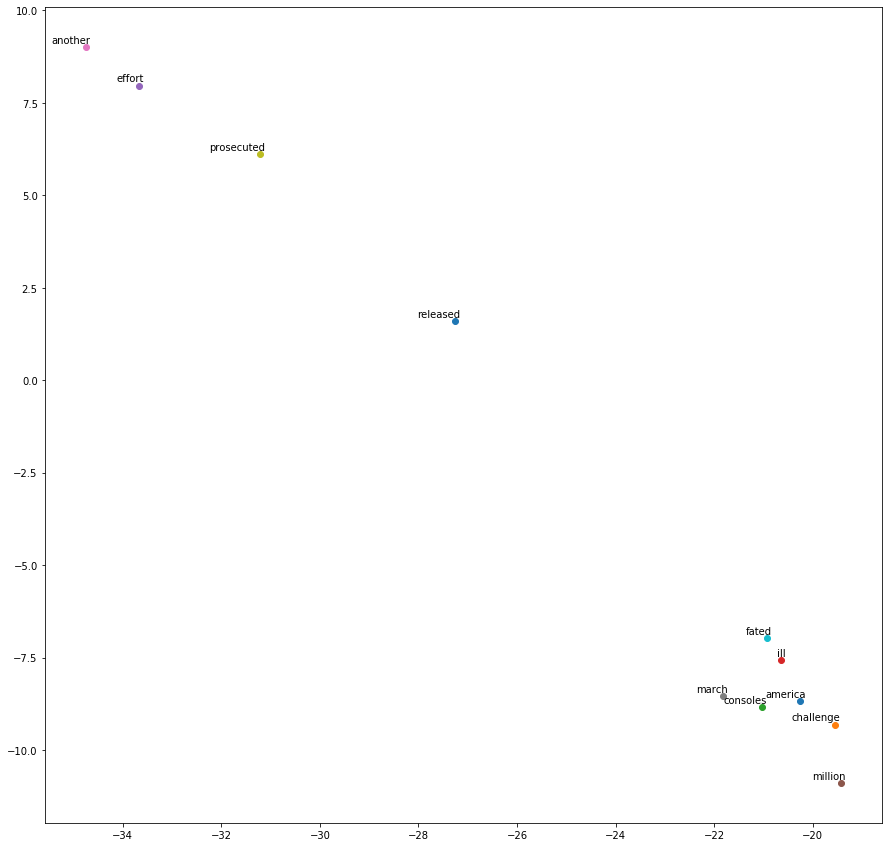

In [17]:
similarity('america')

index of the word computer  is  1334
task1 Thensors of words
tensor([[-0.1467, -0.2623,  2.0981,  1.7803,  0.8654],
        [ 0.4002, -1.3651,  1.4282,  1.3571,  0.6643],
        [-0.2452, -0.4341,  2.4860,  1.0331,  0.9422],
        ...,
        [ 1.4721, -0.0596,  0.3016, -0.0991,  0.4801],
        [-1.2807,  0.9902,  0.5684, -0.9167,  0.4086],
        [-0.5653,  0.7146, -0.1283, -1.0609,  1.4964]])
[1.0, 1334] computer
[0.9507984989571094, 230] play
[0.9464073716198048, 1368] kind
[0.9000776690492684, 1383] djs
[0.8943710336858304, 437] fa
[0.8925449799649059, 866] know
[0.8909323486237584, 1409] look
[0.8908636544240537, 1240] call
[0.8870277492638491, 1241] slipped
[0.8806282828977277, 227] shipped
tensor([ 1.1067,  2.4514,  0.0965, -1.1095,  0.9811], grad_fn=<SelectBackward>) prices
[[-0.9315214  -1.4442122   0.08351138  0.72931194 -0.28253388]
 [-1.8834128  -2.8903742  -0.14235005  0.35239434 -0.31303823]
 [-1.4078059  -1.2168493  -0.1044938   1.1724281  -0.0960169 ]
 ...
 [ 0.6

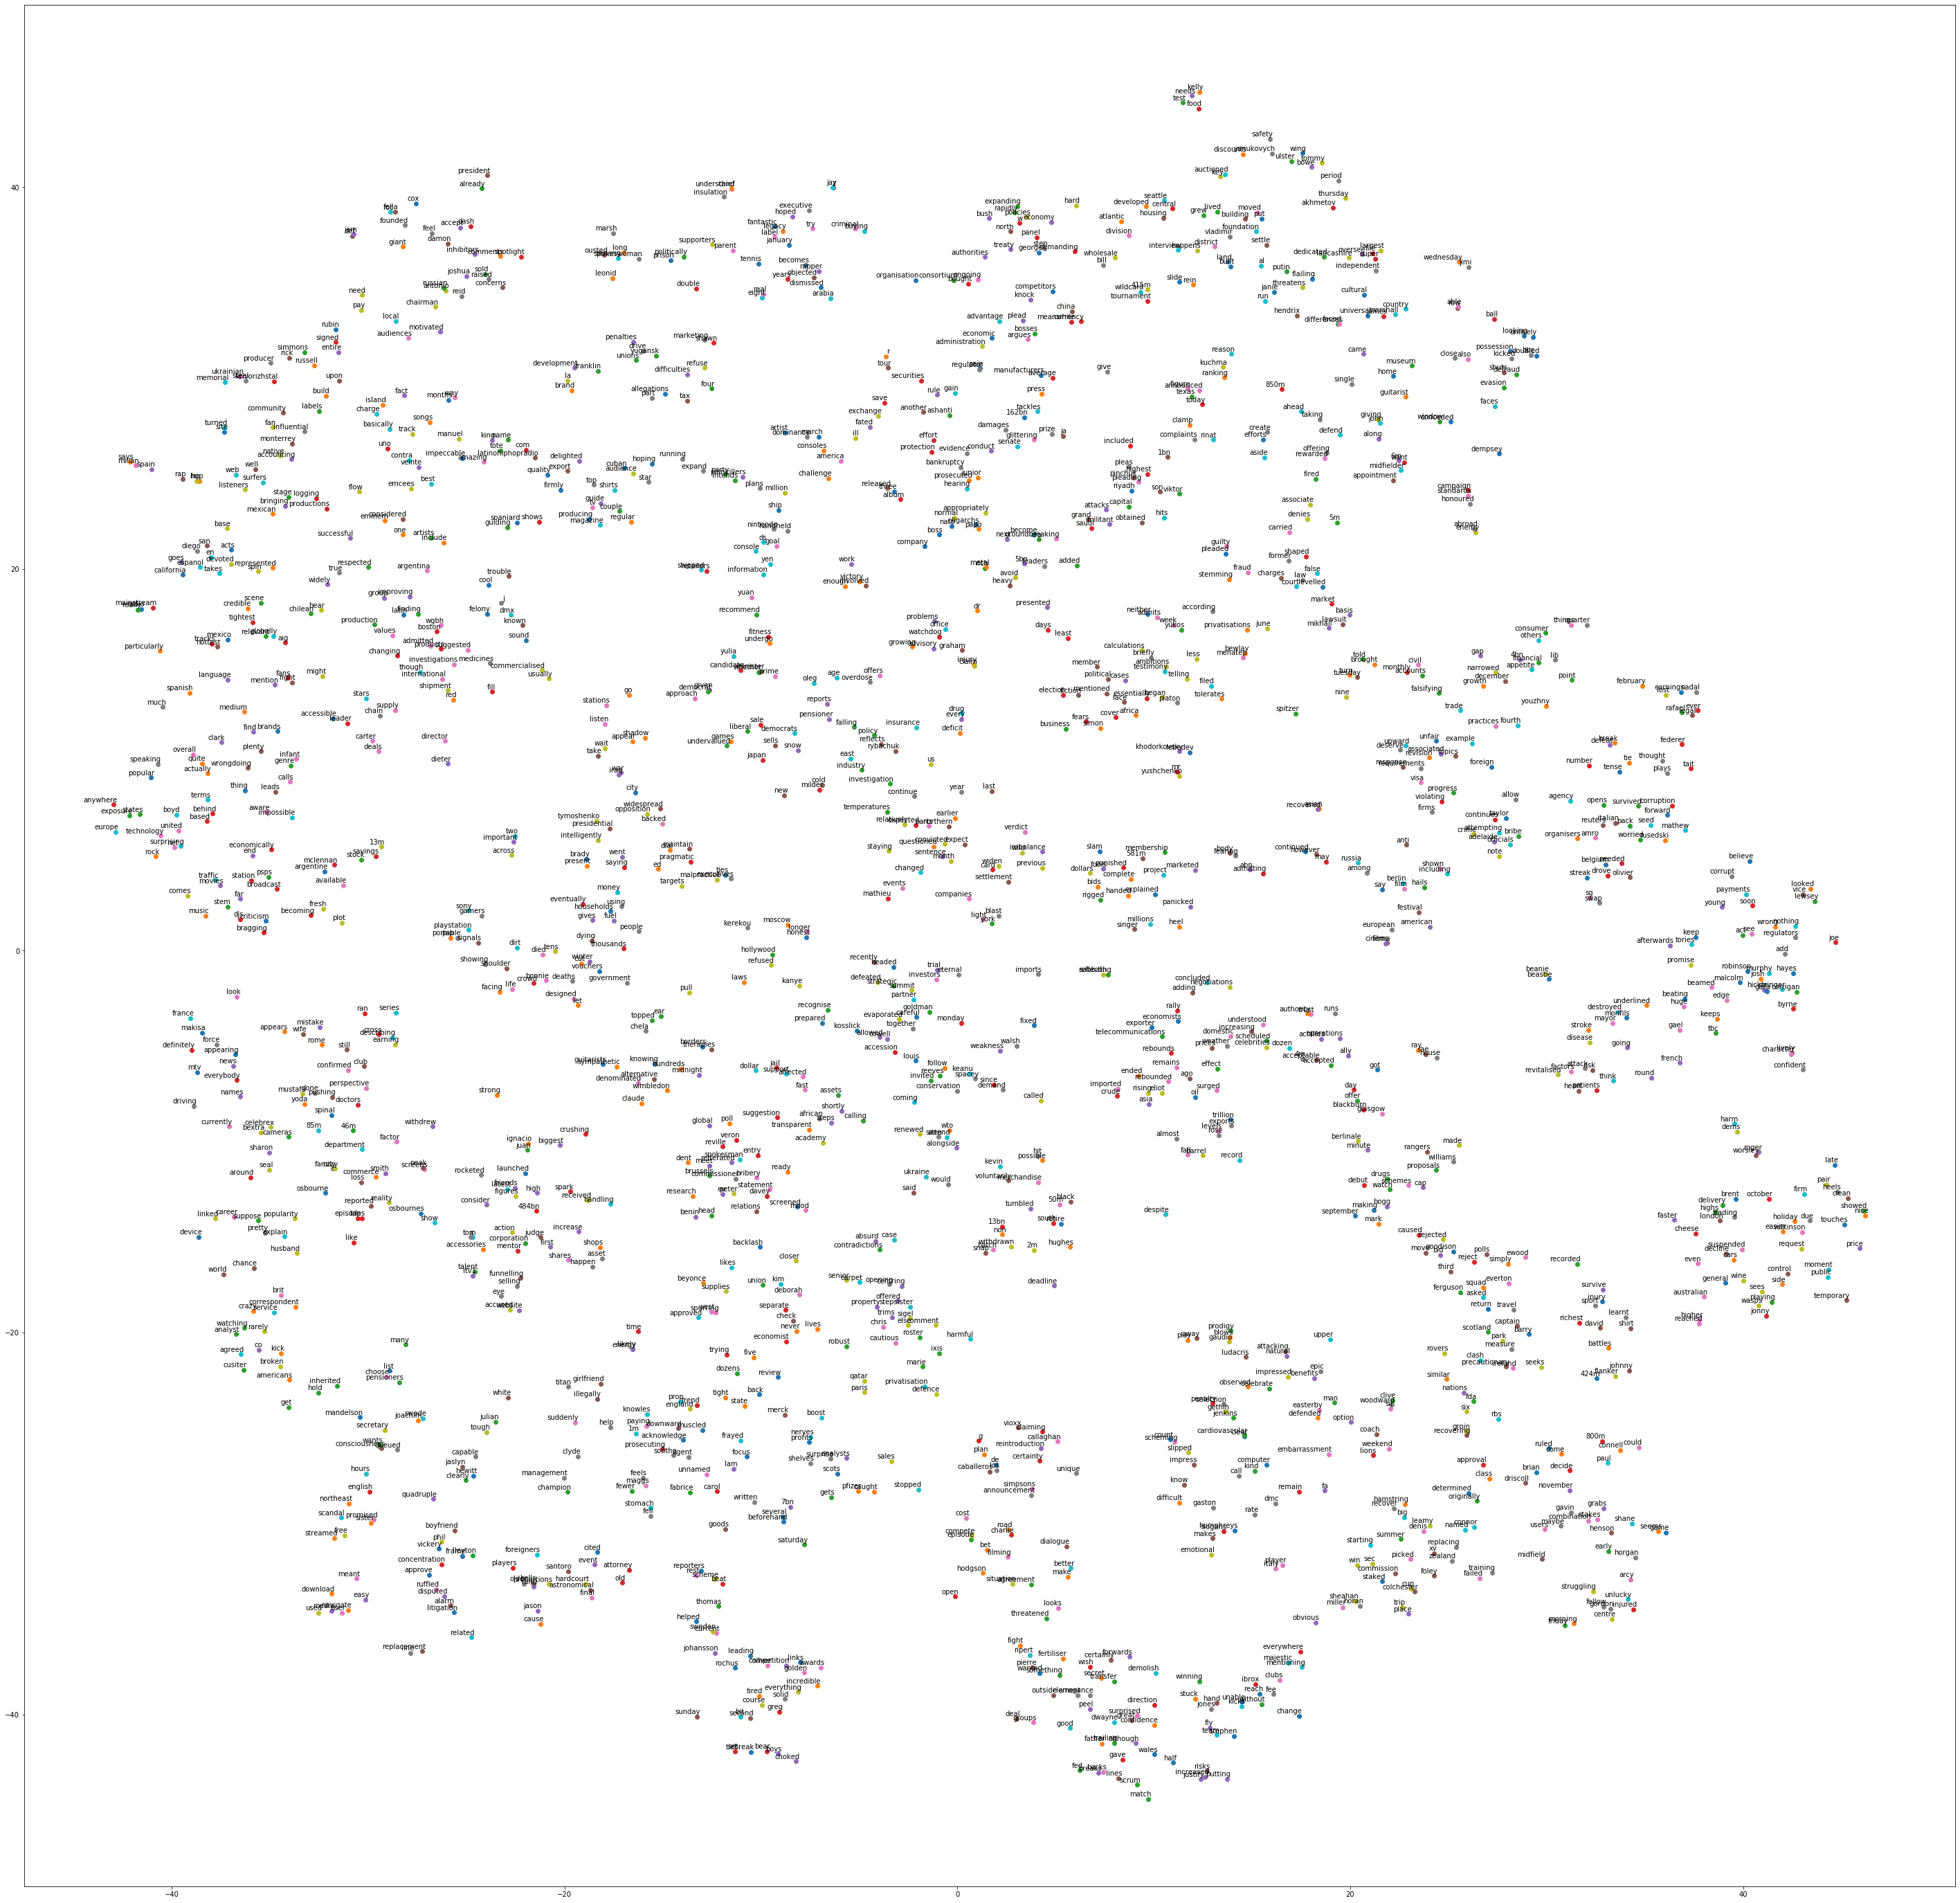

In [14]:
similarity('computer')

index of the word minute  is  47
task1 Thensors of words
tensor([[-0.1467, -0.2623,  2.0981,  1.7803,  0.8654],
        [ 0.4002, -1.3651,  1.4282,  1.3571,  0.6643],
        [-0.2452, -0.4341,  2.4860,  1.0331,  0.9422],
        ...,
        [ 1.4721, -0.0596,  0.3016, -0.0991,  0.4801],
        [-1.2807,  0.9902,  0.5684, -0.9167,  0.4086],
        [-0.5653,  0.7146, -0.1283, -1.0609,  1.4964]])
[1.0, 47] minute
[0.9593637534047993, 403] offer
[0.9563272267758436, 1715] berlinale
[0.9541967188690804, 50] day
[0.9491022755647919, 46] watch
[0.9449076603749194, 988] drugs
[0.9432683687539033, 408] glasgow
[0.9366482916044581, 368] blackburn
[0.9284670652242755, 1056] debut
[0.9233248577758257, 44] making
tensor([ 0.3167, -0.1883, -0.4637,  1.0876, -1.2635], grad_fn=<SelectBackward>) intelligently
[[-0.5618417   0.32175967  0.29018438 -1.0445606   1.7702991 ]
 [-0.18592355  0.5728679  -0.09073227 -1.6520506   2.170109  ]
 [-0.56534654  0.7146414  -0.12826411 -1.0608699   1.4964267 ]
 ..

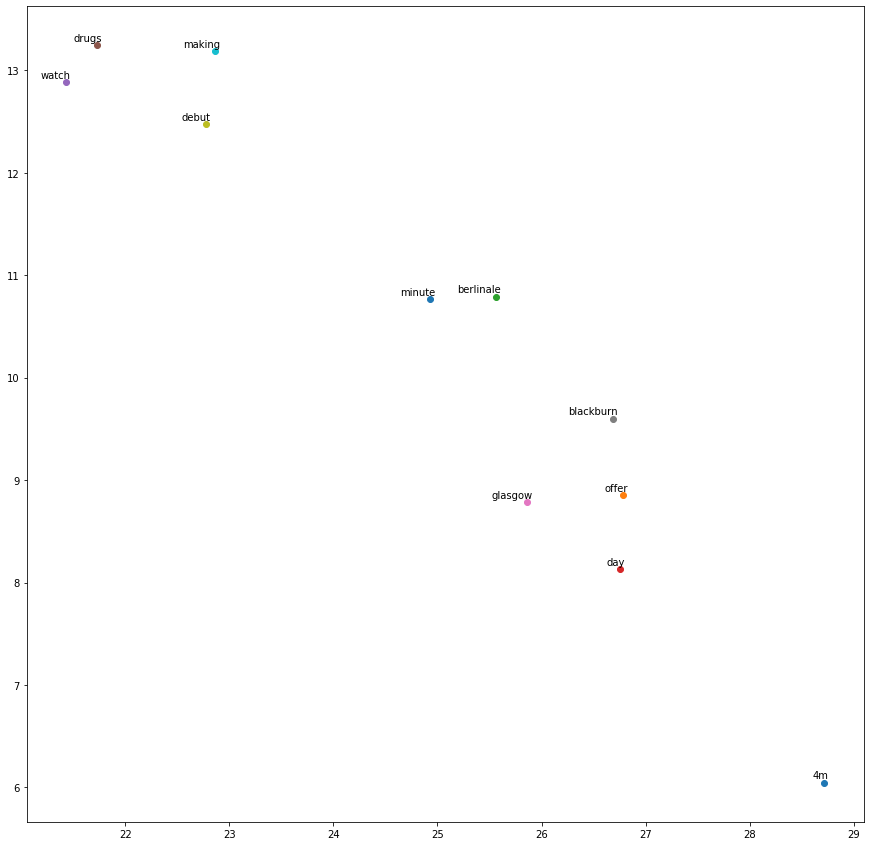

In [18]:
similarity('minute')